<div style="border-radius: 10px; border: #6B8E23 solid; padding: 15px; background-color: #F5F5DC; font-size: 100%; text-align: left">

<h3 align="left"><font color='#556B2F'>📜 Introduction : </font></h3>
    
Smoking has been conclusively linked to numerous health issues, affecting almost every organ in the body and leading to various diseases. It significantly reduces the life expectancy of smokers. As of 2018, it has been recognized as the primary cause of preventable diseases and deaths globally, posing a significant threat to public health.

According to the World Health Organization, smoking is projected to cause 10 million deaths by 2030.

Efforts to assist individuals in quitting smoking through evidence-based treatments have had limited success, with less than one third of participants achieving abstinence. Many physicians find smoking cessation counseling ineffective and time-consuming, leading to infrequent use in daily practice. To address this challenge, various factors have been proposed to identify smokers with a higher likelihood of quitting, such as nicotine dependence, carbon monoxide levels, daily cigarette consumption, age of smoking initiation, previous quit attempts, marital status, emotional well-being, personality traits, and motivation to quit. However, using these factors individually for prediction often yields complex and conflicting results. Developing a prediction model offers a more straightforward way to assess an individual's likelihood of quitting smoking. In recent years, machine learning methods have been employed to create health outcome prediction models, with a specific focus on predicting smoking status using bio-signals. A team of scientists is currently working on such predictive models. Our task is to assist them in developing a machine learning model for identifying an individual's smoking status based on bio-signals.

# Content

1. [Importing & Reading Data](#1)
1. [EDA](#2)
1. [Visualization](#3)
    * [Categorical](#4)
    * [Numerical](#5)
    * [Correlation](#6)
1. [Feature Engineering](#7)
    * [Creating New Features](#8)
    * [Outlier Detection](#9)
    * [Checking Distributions](#10)
1. [Modelling](#11)
1. [Split](#12)
1. [Feature Importance](#13)
1. [LightGBM Classifier](#14)
1. [XGBoost Classifier](#15)
1. [Voting and Stacking Classifier](#16)
1. [Prediction](#17)

<a id="1"></a>
<h1 style="border-radius: 10px; border: 2px solid #6B8E23; background-color: #F5F5DC; font-family: 'Pacifico', cursive; font-size: 200%; text-align: center; border-radius: 15px 50px; padding: 15px; box-shadow: 5px 5px 5px #556B2F; color: #556B2F;">🐼 Importing & Reading Data 🐼</h1>


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

!wget https://raw.githubusercontent.com/h4pZ/rose-pine-matplotlib/main/themes/rose-pine-dawn.mplstyle -P /tmp
plt.style.use("/tmp/rose-pine-dawn.mplstyle")

import warnings
warnings.filterwarnings("ignore")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


--2023-11-13 13:41:22--  https://raw.githubusercontent.com/h4pZ/rose-pine-matplotlib/main/themes/rose-pine-dawn.mplstyle
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 40905 (40K) [text/plain]
Saving to: ‘/tmp/rose-pine-dawn.mplstyle’

rose-pine-dawn.mpls 100%[===================>]  39.95K  --.-KB/s    in 0.01s   

2023-11-13 13:41:23 (3.53 MB/s) - ‘/tmp/rose-pine-dawn.mplstyle’ saved [40905/40905]



In [2]:
path = "/kaggle/input/playground-series-s3e24/"
train = pd.read_csv(path+"train.csv")
test = pd.read_csv(path+"test.csv")
sub = pd.read_csv(path+"sample_submission.csv")
org = pd.read_csv("/kaggle/input/smoker-status-prediction-using-biosignals/train_dataset.csv")

<a id="2"></a>
<h1 style="border-radius: 10px; border: 2px solid #6B8E23; background-color: #F5F5DC; font-family: 'Pacifico', cursive; font-size: 200%; text-align: center; border-radius: 15px 50px; padding: 15px; box-shadow: 5px 5px 5px #556B2F; color: #556B2F;">🔬 EDA 🔬</h1>

In [3]:
train = pd.concat([train.drop("id",axis=1), org], ignore_index=True)
test.drop("id",axis=1, inplace=True)

In [4]:
train.head(10)

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,55,165,60,81.0,0.5,0.6,1,1,135,87,...,40,75,16.5,1,1.0,22,25,27,0,1
1,70,165,65,89.0,0.6,0.7,2,2,146,83,...,57,126,16.2,1,1.1,27,23,37,1,0
2,20,170,75,81.0,0.4,0.5,1,1,118,75,...,45,93,17.4,1,0.8,27,31,53,0,1
3,35,180,95,105.0,1.5,1.2,1,1,131,88,...,38,102,15.9,1,1.0,20,27,30,1,0
4,30,165,60,80.5,1.5,1.0,1,1,121,76,...,44,93,15.4,1,0.8,19,13,17,0,1
5,50,170,55,51.0,1.2,1.2,1,1,146,95,...,31,99,15.9,1,0.7,24,42,119,1,1
6,45,160,55,69.0,1.5,1.2,1,1,150,88,...,69,122,13.0,1,0.7,17,12,16,0,0
7,55,155,60,84.5,0.7,0.9,1,1,137,91,...,51,198,14.5,1,0.7,16,15,16,0,0
8,40,165,70,89.0,0.7,1.0,1,1,130,80,...,59,150,15.7,1,0.9,24,21,31,0,1
9,40,155,50,73.0,1.5,1.5,1,1,105,70,...,55,122,13.2,1,0.7,22,16,14,0,0


<div style="border-radius: 10px; border: #6B8E23 solid; padding: 15px; background-color: #F5F5DC; font-size: 100%; text-align: left">

<h3 align="left"><font color='#556B2F'>👀 Features : </font></h3>

1. **id:** Identification number

2. **age:** Age represented in 5-year intervals.

3. **height (cm):** Individual's height in centimeters.

4. **weight (kg):** Individual's weight in kilograms.

5. **waist (cm):** Length of waist circumference in centimeters.

6. **eyesight (left):** Eyesight measurement for the left eye.

7. **eyesight (right):** Eyesight measurement for the right eye.

8. **hearing (left):** Hearing ability for the left ear.

9. **hearing (right):** Hearing ability for the right ear.

10. **systolic:** Systolic blood pressure measurement.

11. **relaxation:** Diastolic blood pressure measurement.

12. **fasting blood sugar:** Fasting blood sugar measurement.

13. **Cholesterol (total):** Total cholesterol level.

14. **triglyceride:** Triglyceride level.

15. **HDL (High-Density Lipoprotein):** HDL cholesterol level (good cholesterol).

16. **LDL (Low-Density Lipoprotein):** LDL cholesterol level (bad cholesterol).

17. **hemoglobin:** Hemoglobin level.

18. **Urine protein:** Urine protein level.

19. **serum creatinine:** Serum creatinine level.

20. **AST (Aspartate Aminotransferase):** AST (Aspartate Aminotransferase) enzyme level.

21. **ALT (Alanine Aminotransferase):** ALT (Alanine Aminotransferase) enzyme level.

22. **Gtp (γ-Glutamyltranspeptidase):** Gtp (γ-Glutamyltranspeptidase) level.

23. **dental caries:** Dental caries status.

24. **smoking:** Smoking status.

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198240 entries, 0 to 198239
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   age                  198240 non-null  int64  
 1   height(cm)           198240 non-null  int64  
 2   weight(kg)           198240 non-null  int64  
 3   waist(cm)            198240 non-null  float64
 4   eyesight(left)       198240 non-null  float64
 5   eyesight(right)      198240 non-null  float64
 6   hearing(left)        198240 non-null  int64  
 7   hearing(right)       198240 non-null  int64  
 8   systolic             198240 non-null  int64  
 9   relaxation           198240 non-null  int64  
 10  fasting blood sugar  198240 non-null  int64  
 11  Cholesterol          198240 non-null  int64  
 12  triglyceride         198240 non-null  int64  
 13  HDL                  198240 non-null  int64  
 14  LDL                  198240 non-null  int64  
 15  hemoglobin       

In [6]:
train.isnull().sum()

age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
smoking                0
dtype: int64

In [7]:
train.duplicated().sum() # checked amounts of duplicate rows

5517

In [8]:
train.drop_duplicates(inplace = True) # dropped duplicate rows if there is any.

In [9]:
train.nunique()

age                     18
height(cm)              15
weight(kg)              29
waist(cm)              548
eyesight(left)          20
eyesight(right)         18
hearing(left)            2
hearing(right)           2
systolic               128
relaxation              94
fasting blood sugar    259
Cholesterol            279
triglyceride           393
HDL                    123
LDL                    286
hemoglobin             144
Urine protein            6
serum creatinine        34
AST                    196
ALT                    230
Gtp                    444
dental caries            2
smoking                  2
dtype: int64

<div style="border-radius:10px; border:#65647C solid; padding: 15px; background-color: #F8EDE3; font-size:100%; text-align:left">

<h3 align="left"><font color='#7D6E83'><b>🗨️ Comment: </b></font></h3>
    
* As we can see, there are no null values.
* We should remove duplicate rows before modeling. Therefore, 'drop_duplicates' was applied.
* Let's convert the smoking status into binary form for modeling (0/1).

In [10]:
train["smoking"]=train["smoking"].map({0: False,1: True})

In [11]:
num_cols = [col for col in train.columns if (train[col].dtype in ["int64","float64"]) & (train[col].nunique()>10)]

num_cols

['age',
 'height(cm)',
 'weight(kg)',
 'waist(cm)',
 'eyesight(left)',
 'eyesight(right)',
 'systolic',
 'relaxation',
 'fasting blood sugar',
 'Cholesterol',
 'triglyceride',
 'HDL',
 'LDL',
 'hemoglobin',
 'serum creatinine',
 'AST',
 'ALT',
 'Gtp']

In [12]:
cat_cols = [col for col in train.columns if train[col].nunique()<10]

cat_cols

['hearing(left)',
 'hearing(right)',
 'Urine protein',
 'dental caries',
 'smoking']

<div style="border-radius:10px; border:#65647C solid; padding: 15px; background-color: #F8EDE3; font-size:100%; text-align:left">

<h3 align="left"><font color='#7D6E83'><b>🗨️ Comment: </b></font></h3>
    
* We identified columns with more than 10 unique values as **"number features"**. Those with 10 or fewer unique values were categorized as **"categorical variables"**.

<a id="3"></a>
<h1 style="border-radius: 10px; border: 2px solid #6B8E23; background-color: #F5F5DC; font-family: 'Pacifico', cursive; font-size: 200%; text-align: center; border-radius: 15px 50px; padding: 15px; box-shadow: 5px 5px 5px #556B2F; color: #556B2F;">🐼 Visualization 🐼</h1>

<a id = "4"></a><br>
<p style="font-family: 'Pacifico', cursive; font-weight: bold; letter-spacing: 2px; color: #556B2F; font-size: 160%; text-align: left; padding: 0px; border-bottom: 3px solid">✨Categorical✨</p>

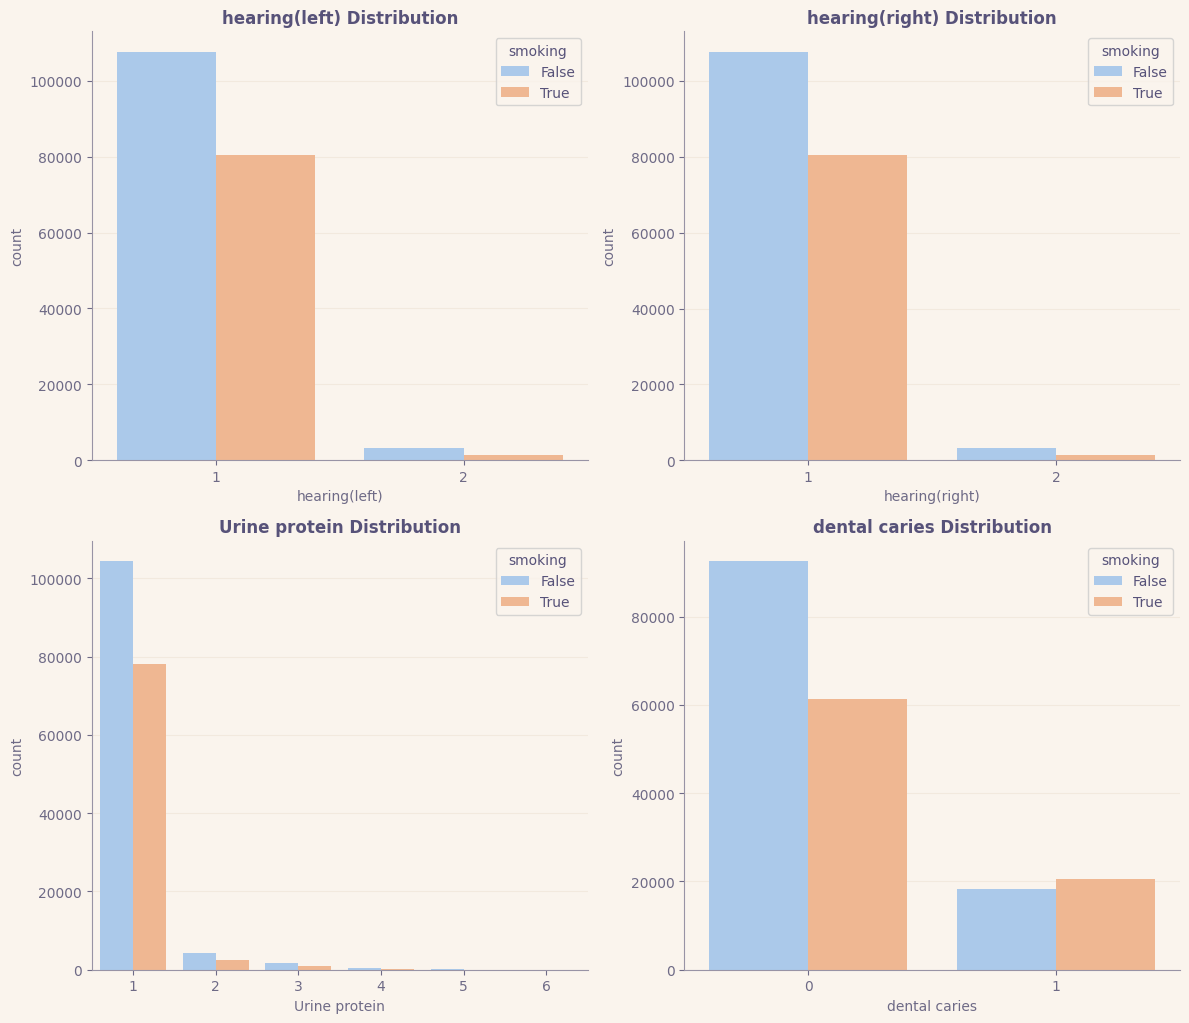

In [13]:
plt.figure(figsize=(12,len(cat_cols)*3))
for idx,column in enumerate(cat_cols[:-1]):
    plt.subplot(len(cat_cols)//2+1,2,idx+1)
    sns.countplot(hue="smoking", x=column, data=train, palette="pastel")
    plt.title(f"{column} Distribution",weight='bold',fontsize=12)
    plt.tight_layout()

<a id = "5"></a><br>
<p style="font-family: 'Pacifico', cursive; font-weight: bold; letter-spacing: 2px; color: #556B2F; font-size: 160%; text-align: left; padding: 0px; border-bottom: 3px solid">✨Numerical✨</p>

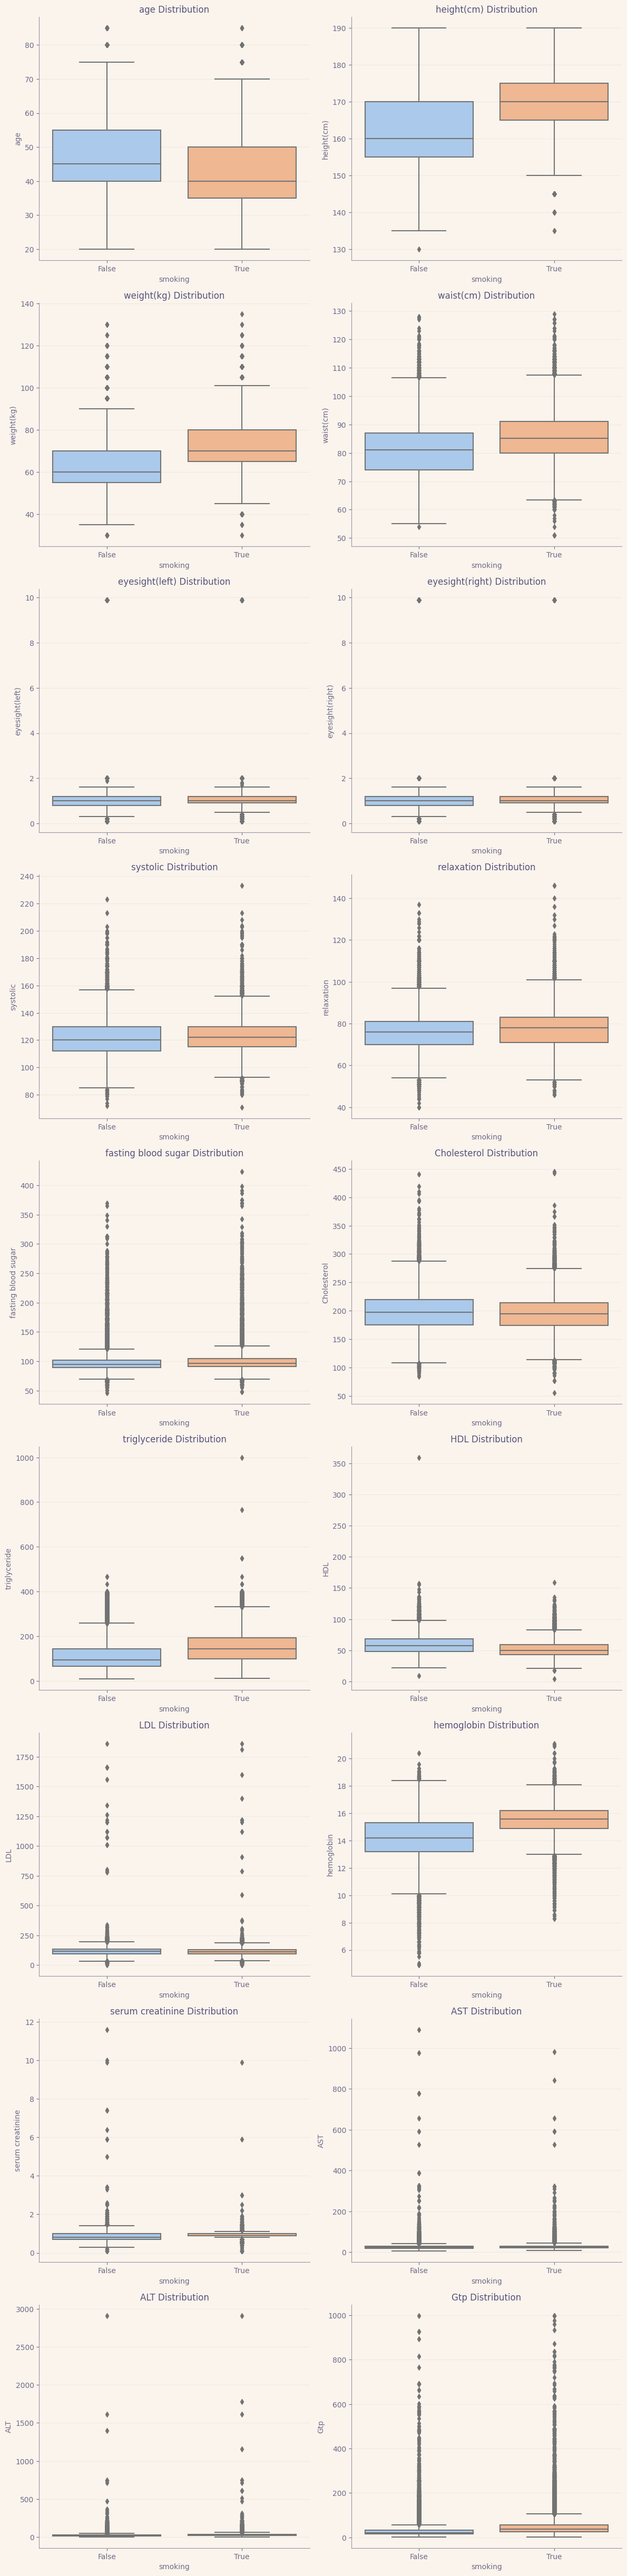

In [14]:
plt.figure(figsize=(12,len(num_cols)*3))
for idx,column in enumerate(num_cols):
    plt.subplot(len(num_cols)//2+1,2,idx+1)
    sns.boxplot(x="smoking", y=column, data=train,palette="pastel")
    plt.title(f"{column} Distribution")
    plt.tight_layout()

<a id = "6"></a><br>
<p style="font-family: 'Pacifico', cursive; font-weight: bold; letter-spacing: 2px; color: #556B2F; font-size: 160%; text-align: left; padding: 0px; border-bottom: 3px solid">✨Correlation✨</p>

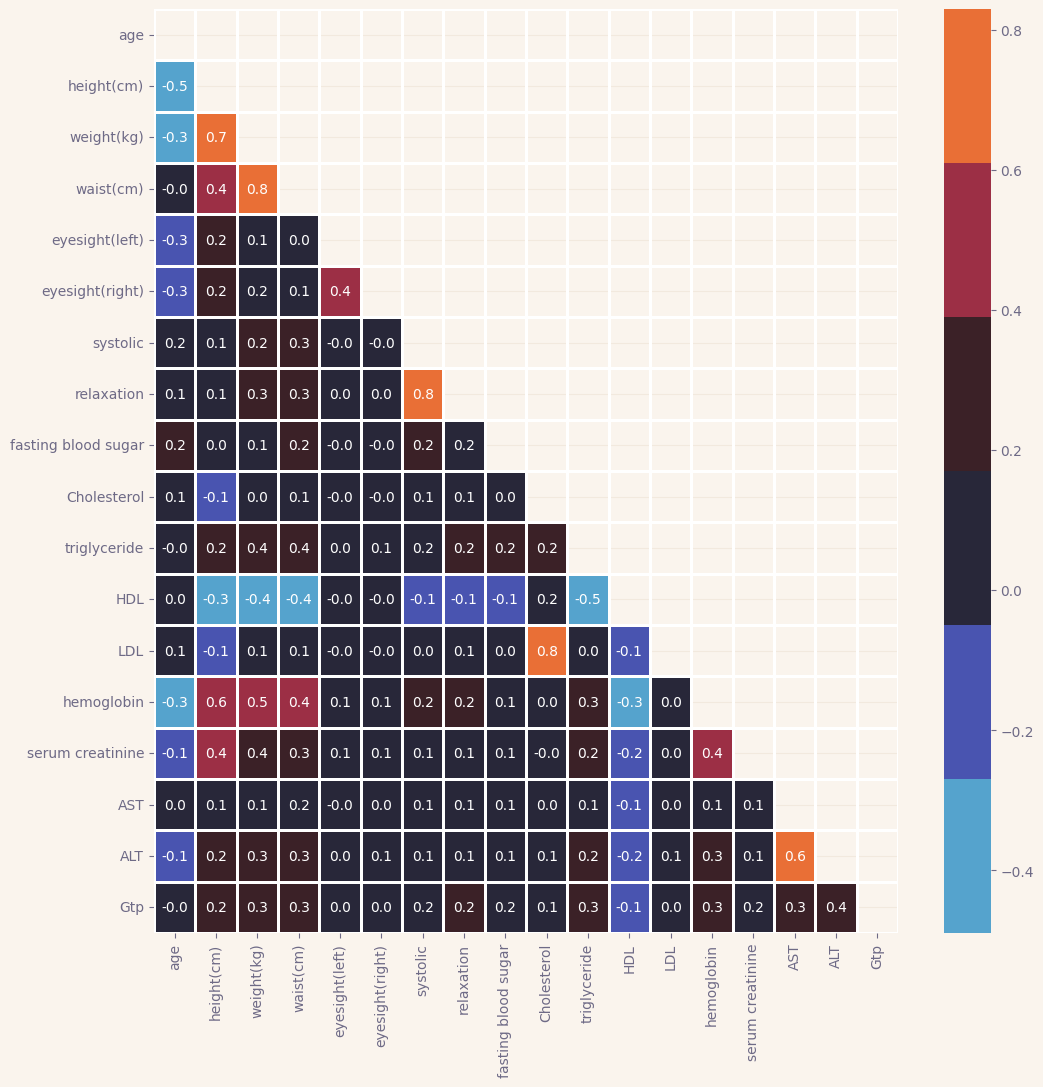

In [15]:
plt.figure(figsize=(12,12))
corr=train[num_cols].corr(numeric_only=True)
mask= np.triu(np.ones_like(corr))
sns.heatmap(corr, annot=True, fmt=".1f", linewidths=1, mask=mask, cmap=sns.color_palette("icefire"));

<a id="7"></a>
<h1 style="border-radius: 10px; border: 2px solid #6B8E23; background-color: #F5F5DC; font-family: 'Pacifico', cursive; font-size: 200%; text-align: center; border-radius: 15px 50px; padding: 15px; box-shadow: 5px 5px 5px #556B2F; color: #556B2F;">🛠️ Feature Engineering 🛠️</h1>

<a id = "8"></a><br>
<p style="font-family: 'Pacifico', cursive; font-weight: bold; letter-spacing: 2px; color: #556B2F; font-size: 160%; text-align: left; padding: 0px; border-bottom: 3px solid">✨Creating New Features✨</p>

In [16]:
train["height(cm)"] = train["height(cm)"] / 100
test["height(cm)"] = test["height(cm)"] / 100

train["BMI"] = train["weight(kg)"] / train["height(cm)"] ** 2
test["BMI"] = test["weight(kg)"] / test["height(cm)"] ** 2

<div style="border-radius:10px; border:#65647C solid; padding: 15px; background-color: #F8EDE3; font-size:100%; text-align:left">

<h3 align="left"><font color='#7D6E83'><b>🗨️ Comment: </b></font></h3>
    
BMI, Body Mass Index, is a numerical measure of a person's weight in relation to their height. It is used as a simple and quick way to assess whether an individual has a healthy body weight for their height. BMI is calculated by dividing a person's weight in kilograms by the square of their height in meters.

* BMI = (Weight in kilograms) / (Height in meters)^2
    * BMI < 18.5 - Underwieght
    * BMI between 18.5- 24.99 - Normal
    * BMI between 25- 29.99 - Overweight
    * BMI between 30-34.99 - Obesity
* Ranked as;         
    * Normal - 1
    * Underweight, Overweight - 2
    * Obesity - 3

In [17]:
train["Triglyceride_Rank"] = pd.cut(train["triglyceride"], 
                        bins = [0,150,199,499,train["triglyceride"].max()],
                        labels = [1,2,3,4]).astype(int)

test["Triglyceride_Rank"] = pd.cut(test["triglyceride"], 
                        bins = [0,150,199,499,test["triglyceride"].max()],
                        labels = [1,2,3,4]).astype(int)

<div style="border-radius:10px; border:#65647C solid; padding: 15px; background-color: #F8EDE3; font-size:100%; text-align:left">

<h3 align="left"><font color='#7D6E83'><b>🗨️ Comment: </b></font></h3>
    
To maintain good health, it's essential to keep triglyceride levels within a healthy range. Triglyceride levels;
    
* Less than 150 - normal
* 150- 199- moderate risk
* 200-499- high risk
* 500+ - very high risk
    
Also changed as numbers for modelling;
    
* Normal - 1
* Moderate Risk - 2
* High Risk - 3
* Very High Risk - 4

In [18]:
train["Cho_Rank"] = pd.cut(train["Cholesterol"], 
                        bins = [0,200,239,train["Cholesterol"].max()],
                        labels = [1,2,3]).astype(int)

test["Cho_Rank"] = pd.cut(test["Cholesterol"], 
                        bins = [0,200,239,test["Cholesterol"].max()],
                        labels = [1,2,3]).astype(int)

<div style="border-radius:10px; border:#65647C solid; padding: 15px; background-color: #F8EDE3; font-size:100%; text-align:left">

<h3 align="left"><font color='#7D6E83'><b>🗨️ Comment: </b></font></h3>

Total cholesterol levels are typically measured in milligrams per deciliter (mg/dL) of blood in the United States. The measurement includes both "low-density lipoprotein" (LDL) cholesterol, often referred to as "bad cholesterol," and "high-density lipoprotein" (HDL) cholesterol, known as "good cholesterol." Levels of total cholesterol;
    
* Less than 200mg/dL Desirable
* 200-239 mg/dL Borderline high
* 240mg/dL and above High
    
Also changed as rank numbers for modelling;
    
* Desirable - 1
* Borderline High - 2
* High - 3

In [19]:
train['Cholesterol_Lipit'] = train['Cholesterol'] / train['HDL']
test['Cholesterol_Lipit'] = test['Cholesterol'] / test['HDL']

<div style="border-radius:10px; border:#65647C solid; padding: 15px; background-color: #F8EDE3; font-size:100%; text-align:left">

<h3 align="left"><font color='#7D6E83'><b>🗨️ Comment: </b></font></h3> 
    
Cholesterol and lipid profile is a blood test that measures a person's levels of lipids (fats) in the blood. Lipids are fats and related compounds used by the body for energy. Cholesterol and lipid profile is an important medical test used to assess a person's cardiovascular health and predict the risk of cardiovascular diseases.

Cholesterol and lipid profile helps assess the accumulation of fat in the vessel walls and the risk of atherosclerosis (hardening of the arteries). Based on the results of cholesterol and lipid profile, healthcare professionals evaluate a person's risk of cardiovascular disease and recommend treatment or lifestyle changes if necessary. This test can help in the prevention and management of heart attacks, strokes, and other cardiovascular diseases.

In [20]:
# train["LDL_tri"] = train["LDL"] / train["triglyceride"]
# train["Liver_Enzyme"] = train["AST"] / train["ALT"]
# 
# test["LDL_tri"] = test["LDL"] / test["triglyceride"]
# test["Liver_Enzyme"] = test["AST"] / test["ALT"]

In [21]:
train = train.drop(["eyesight(left)","eyesight(right)","hearing(left)","hearing(right)"],axis=1,inplace= False)
test = test.drop(["eyesight(left)","eyesight(right)","hearing(left)","hearing(right)"],axis=1,inplace=False)

In [22]:
train.head()

,age,height(cm),weight(kg),waist(cm),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,...,serum creatinine,AST,ALT,Gtp,dental caries,smoking,BMI,Triglyceride_Rank,Cho_Rank,Cholesterol_Lipit
0,55,1.65,60,81.0,135,87,94,172,300,40,...,1.0,22,25,27,0,True,22.038567,3,1,4.300000
1,70,1.65,65,89.0,146,83,147,194,55,57,...,1.1,27,23,37,1,False,23.875115,1,1,3.403509
2,20,1.70,75,81.0,118,75,79,178,197,45,...,0.8,27,31,53,0,True,25.951557,2,1,3.955556
3,35,1.80,95,105.0,131,88,91,180,203,38,...,1.0,20,27,30,1,False,29.320988,3,1,4.736842
4,30,1.65,60,80.5,121,76,91,155,87,44,...,0.8,19,13,17,0,True,22.038567,1,1,3.522727


In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 192723 entries, 0 to 198239
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   age                  192723 non-null  int64  
 1   height(cm)           192723 non-null  float64
 2   weight(kg)           192723 non-null  int64  
 3   waist(cm)            192723 non-null  float64
 4   systolic             192723 non-null  int64  
 5   relaxation           192723 non-null  int64  
 6   fasting blood sugar  192723 non-null  int64  
 7   Cholesterol          192723 non-null  int64  
 8   triglyceride         192723 non-null  int64  
 9   HDL                  192723 non-null  int64  
 10  LDL                  192723 non-null  int64  
 11  hemoglobin           192723 non-null  float64
 12  Urine protein        192723 non-null  int64  
 13  serum creatinine     192723 non-null  float64
 14  AST                  192723 non-null  int64  
 15  ALT                  1

<a id = "9"></a><br>
<p style="font-family: 'Pacifico', cursive; font-weight: bold; letter-spacing: 2px; color: #556B2F; font-size: 160%; text-align: left; padding: 0px; border-bottom: 3px solid">✨Outlier Detection✨</p>

In [24]:
num_cols = [col for col in train.columns if (train[col].dtype in ["int64","float64"]) & (train[col].nunique()>10)]

In [25]:
def corr_skew_outliner(df, cols):

    #outliner and #skewness part
    for col in cols:
        Q1 = df[col].quantile(0.01)
        Q3 = df[col].quantile(0.95)
        df.loc[df[col] < Q1, col] = Q1
        df.loc[df[col] > Q3, col] = Q3
        df[col] = np.sqrt(df[col])
        
    return df

In [26]:
train = corr_skew_outliner(train,num_cols)
test = corr_skew_outliner(test,num_cols)

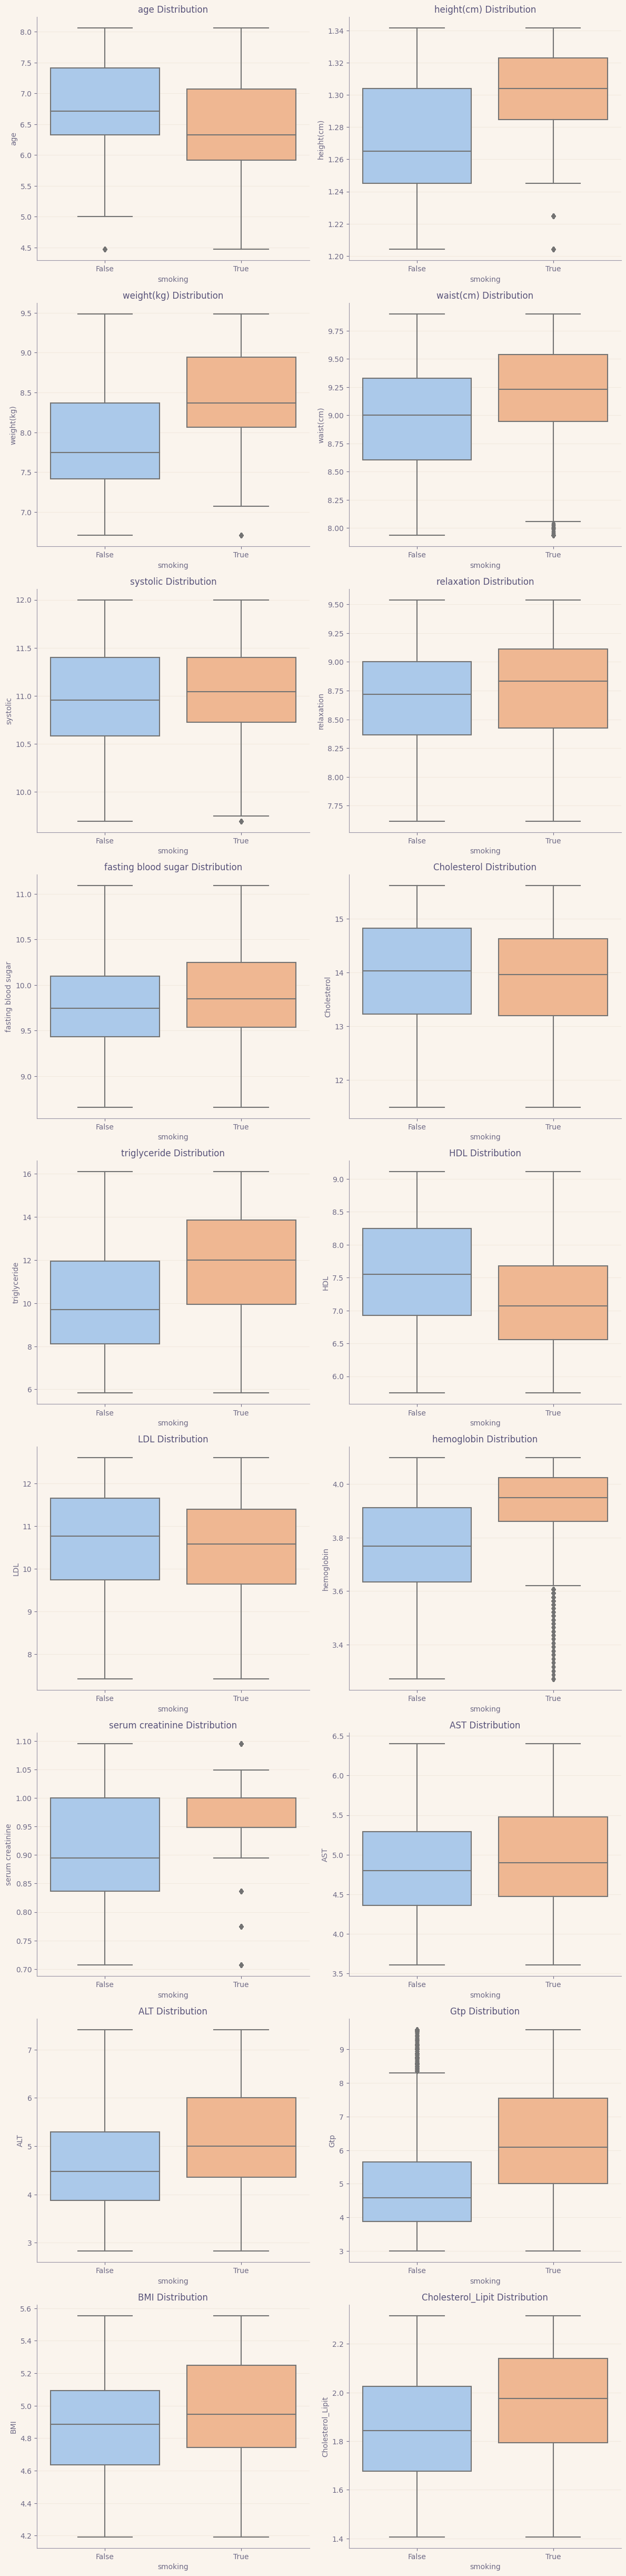

In [27]:
plt.figure(figsize=(12,len(num_cols)*3))
for idx,column in enumerate(num_cols):
    plt.subplot(len(num_cols)//2+1,2,idx+1)
    sns.boxplot(x="smoking", y=column, data=train,palette="pastel")
    plt.title(f"{column} Distribution")
    plt.tight_layout()

<a id = "10"></a><br>
<p style="font-family: 'Pacifico', cursive; font-weight: bold; letter-spacing: 2px; color: #556B2F; font-size: 160%; text-align: left; padding: 0px; border-bottom: 3px solid">✨Checking Distributions✨</p>

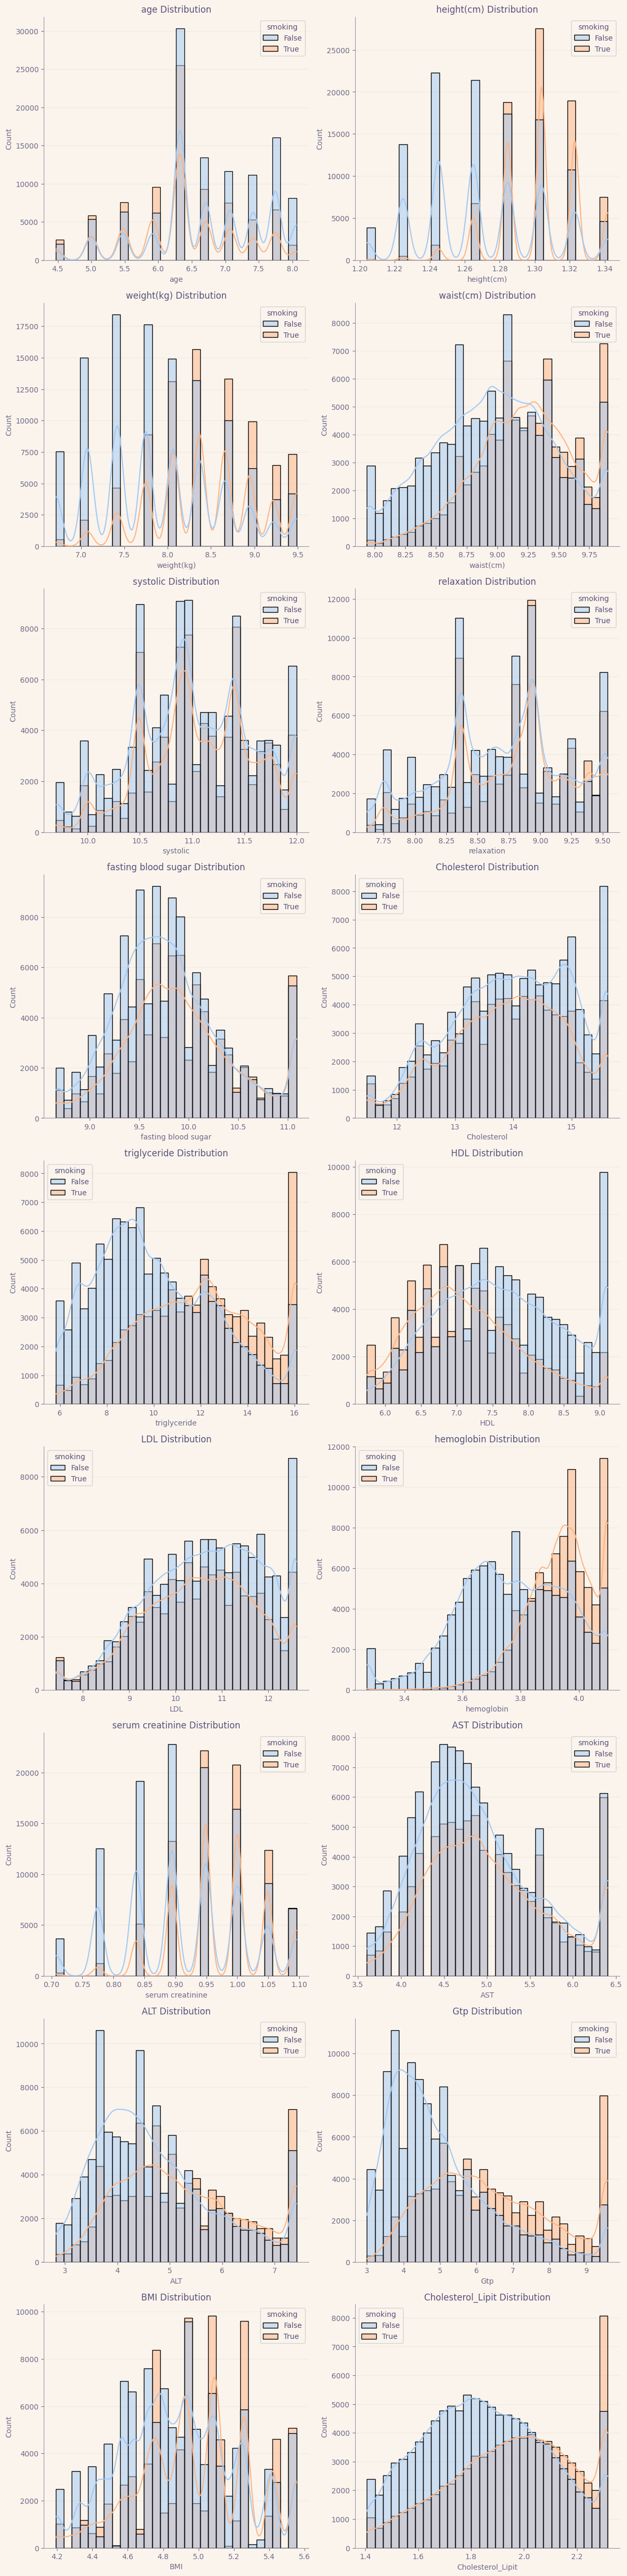

In [28]:
plt.figure(figsize=(12,len(num_cols)*3))
for idx,column in enumerate(num_cols):
    plt.subplot(len(num_cols)//2+1,2,idx+1)
    sns.histplot(x=column, hue="smoking", data=train,bins=30,kde=True, palette="pastel")
    plt.title(f"{column} Distribution")
    plt.tight_layout()

<div style="border-radius:10px; border:#65647C solid; padding: 15px; background-color: #F8EDE3; font-size:100%; text-align:left">

<h3 align="left"><font color='#7D6E83'><b>🗨️ Comment: </b></font></h3>
    
* It seems like the removal of outliers has worked.

<a id="11"></a>
<h1 style="border-radius: 10px; border: 2px solid #6B8E23; background-color: #F5F5DC; font-family: 'Pacifico', cursive; font-size: 200%; text-align: center; border-radius: 15px 50px; padding: 15px; box-shadow: 5px 5px 5px #556B2F; color: #556B2F;">🐼 Modelling 🐼</h1>

<a id = "12"></a><br>
<p style="font-family: 'Pacifico', cursive; font-weight: bold; letter-spacing: 2px; color: #556B2F; font-size: 160%; text-align: left; padding: 0px; border-bottom: 3px solid">✨Split✨</p>

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = train.drop("smoking", axis=1)
y = train["smoking"]


X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.1, random_state = 401)

<a id = "13"></a><br>
<p style="font-family: 'Pacifico', cursive; font-weight: bold; letter-spacing: 2px; color: #556B2F; font-size: 160%; text-align: left; padding: 0px; border-bottom: 3px solid">✨Feature Importance✨</p>

0.7788616198827375

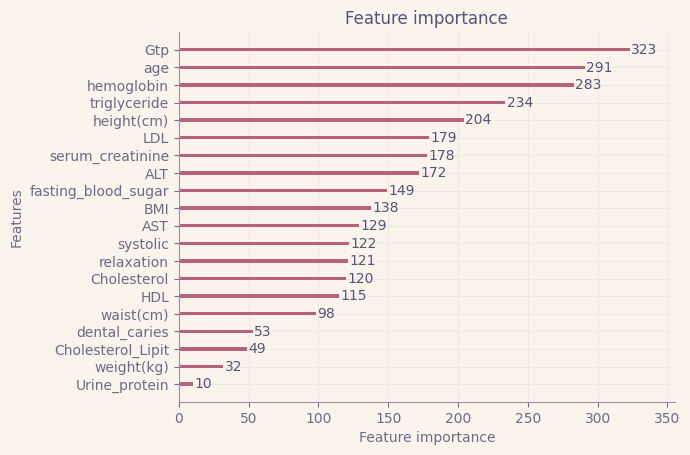

In [30]:
import lightgbm
lgb = lightgbm.LGBMClassifier()
lgb.fit(X_train, y_train)
lightgbm.plot_importance(lgb);
accuracy_score(y_test,lgb.predict(X_test))

0.7786540756498729

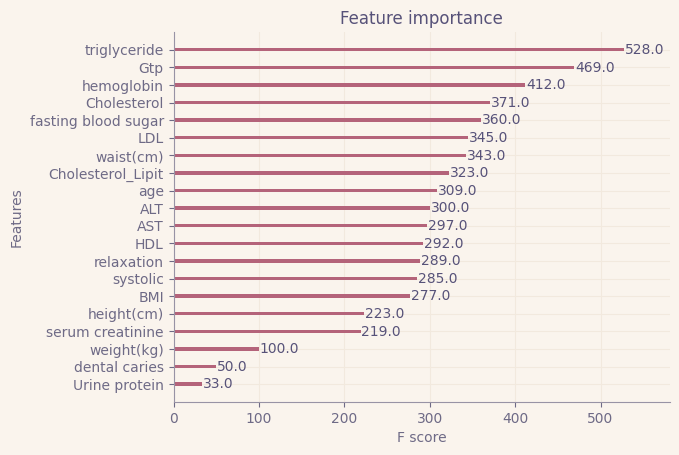

In [31]:
import xgboost
xgb = xgboost.XGBClassifier()
xgb.fit(X_train, y_train)
xgboost.plot_importance(xgb);
accuracy_score(y_test,xgb.predict(X_test))

<a id = "14"></a><br>
<p style="font-family: 'Pacifico', cursive; font-weight: bold; letter-spacing: 2px; color: #556B2F; font-size: 160%; text-align: left; padding: 0px; border-bottom: 3px solid">✨LightGBM Classifier✨</p>

In [32]:
from lightgbm import LGBMClassifier
import optuna

def objective_lgb(trial):
    """Define the objective function"""

    params = {
        'metric': trial.suggest_categorical('metric', ['binary_error']),
        'max_depth': trial.suggest_int('max_depth', 1, 10),
        'min_child_samples': trial.suggest_int('min_child_samples', 1, 15),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),
        'n_estimators': trial.suggest_int('n_estimators', 300, 700),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'subsample': trial.suggest_float('subsample', 0.1, 0.9),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.01, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.01, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.01, 1.0),
        "seed" : trial.suggest_categorical('seed', [42]),
        'device': trial.suggest_categorical('device', ['gpu']),
    }


    model_lgb = LGBMClassifier(**params)
    model_lgb.fit(X_train, y_train)
    y_pred = model_lgb.predict(X_test)
    return accuracy_score(y_test,y_pred)

In [33]:
study_lgb = optuna.create_study(direction='maximize')
optuna.logging.set_verbosity(optuna.logging.WARNING)
study_lgb.optimize(objective_lgb, n_trials=50,show_progress_bar=True)

[I 2023-11-13 13:42:37,265] A new study created in memory with name: no-name-caef01af-54c7-488f-8323-23894d79c08d


  0%|          | 0/50 [00:00<?, ?it/s]

In [34]:
# Print the best parameters;

print('Best parameters', study_lgb.best_params)

Best parameters {'metric': 'binary_error', 'max_depth': 7, 'min_child_samples': 5, 'learning_rate': 0.023757678717216773, 'n_estimators': 642, 'min_child_weight': 10, 'subsample': 0.8324916291503065, 'colsample_bytree': 0.4818159581177222, 'reg_alpha': 0.11084432673128669, 'reg_lambda': 0.341333431666075, 'seed': 42, 'device': 'gpu'}


In [35]:
lgb = LGBMClassifier(**study_lgb.best_params)
lgb.fit(X_train, y_train)
y_pred = lgb.predict(X_test)

print('Accuracy: ', accuracy_score(y_test, y_pred))

Accuracy:  0.7839983396461371


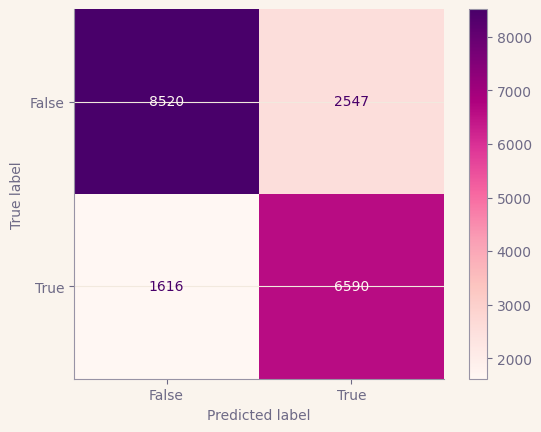

In [36]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(lgb,X_test, y_test,display_labels=("False", "True"),cmap="RdPu");

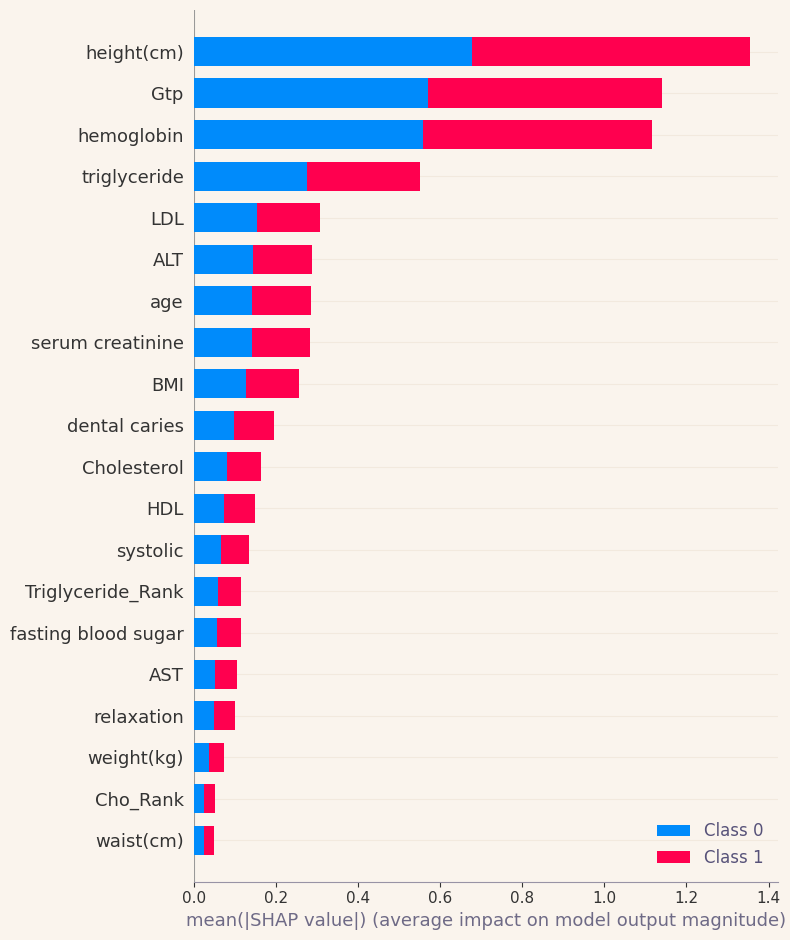

In [37]:
import shap 
explainer = shap.TreeExplainer(lgb)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

<a id = "15"></a><br>
<p style="font-family: 'Pacifico', cursive; font-weight: bold; letter-spacing: 2px; color: #556B2F; font-size: 160%; text-align: left; padding: 0px; border-bottom: 3px solid">✨XGBoost Classifier✨</p>

In [38]:
from xgboost import XGBClassifier
import optuna
def objective_xg(trial):
    """Define the objective function"""

    params = {
        'booster': trial.suggest_categorical('booster', ['gbtree']),
        'max_depth': trial.suggest_int('max_depth', 1, 10),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),
        'n_estimators': trial.suggest_int('n_estimators', 300, 1000),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
        'subsample': trial.suggest_loguniform('subsample', 0.3, 0.9),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.01, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.01, 1.0),
        "seed" : trial.suggest_categorical('seed', [42]),
        'tree_method': trial.suggest_categorical('tree_method', ['gpu_hist']),
        'objective': trial.suggest_categorical('objective', ['binary:logistic']),
    }
    model_xgb = XGBClassifier(**params)
    model_xgb.fit(X_train, y_train)
    y_pred = model_xgb.predict(X_test)
    return accuracy_score(y_test,y_pred)

In [39]:
study_xgb = optuna.create_study(direction='maximize')
optuna.logging.set_verbosity(optuna.logging.WARNING)
study_xgb.optimize(objective_xg, n_trials=50,show_progress_bar=True)

  0%|          | 0/50 [00:00<?, ?it/s]

In [40]:
# Print the best parameters;

print('Best parameters', study_xgb.best_params)

Best parameters {'booster': 'gbtree', 'max_depth': 6, 'learning_rate': 0.034148923105821266, 'n_estimators': 734, 'min_child_weight': 4, 'gamma': 0.012282462827984841, 'subsample': 0.8697473522486171, 'reg_alpha': 0.5584797055510196, 'reg_lambda': 0.16019171288139122, 'seed': 42, 'tree_method': 'gpu_hist', 'objective': 'binary:logistic'}


In [41]:
xgb = XGBClassifier(**study_xgb.best_params)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

print('Accuracy: ', accuracy_score(y_test, y_pred))

Accuracy:  0.7856586935090542


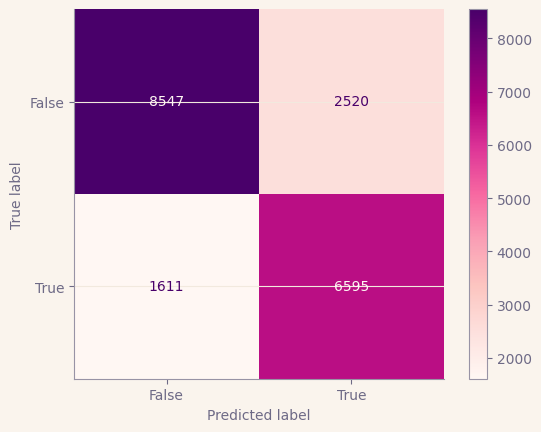

In [42]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(xgb,X_test, y_test,display_labels=("False", "True"),cmap="RdPu");

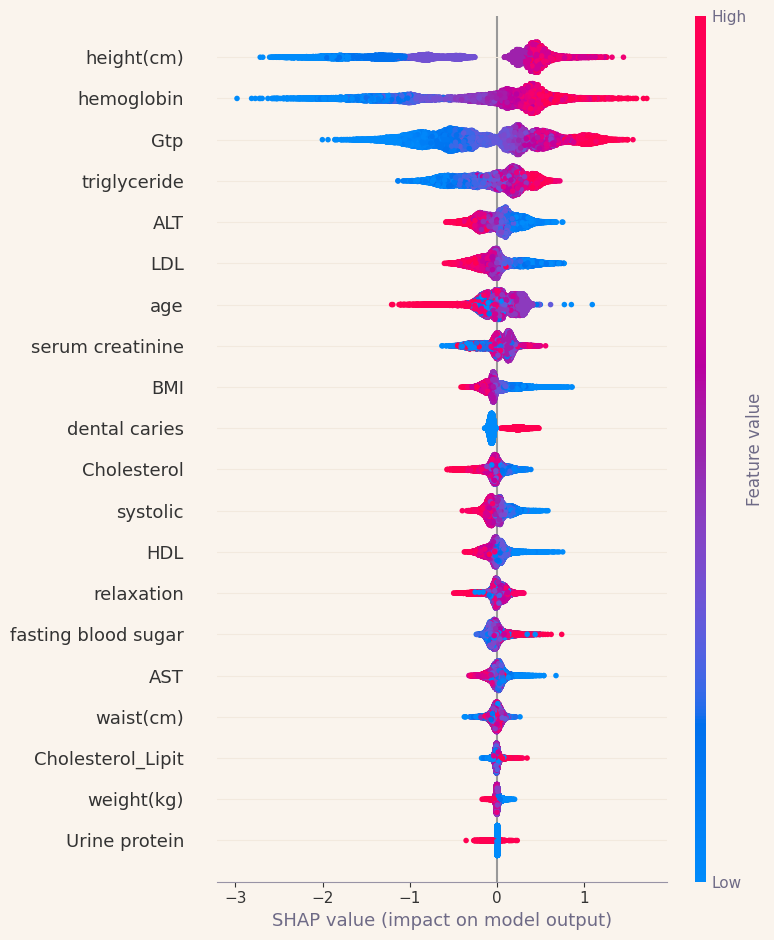

In [43]:
import shap 
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

<a id = "16"></a><br>
<p style="font-family: 'Pacifico', cursive; font-weight: bold; letter-spacing: 2px; color: #556B2F; font-size: 160%; text-align: left; padding: 0px; border-bottom: 3px solid">✨Voting and Stacking Classifier✨</p>

In [44]:
from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(estimators=[
                                      ('lgbm', lgb), 
                                      ('xgb', xgb)], voting='soft')
voting.fit(X_train,y_train)
voting_pred = voting.predict(X_test)

print('Accuracy: ', accuracy_score(y_test, voting_pred))

Accuracy:  0.7847247444611632


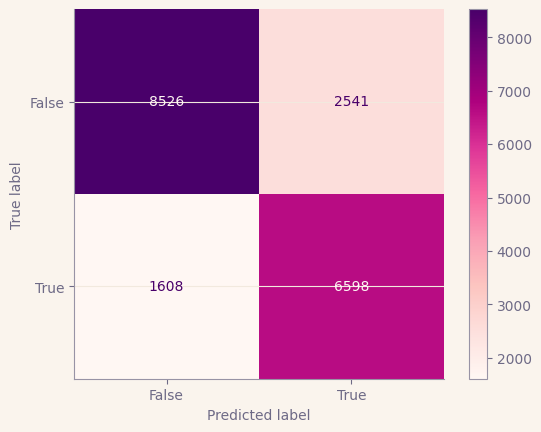

In [45]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(voting,X_test, y_test,display_labels=("False", "True"),cmap="RdPu");

In [46]:
from sklearn.ensemble import StackingClassifier
stk = StackingClassifier(estimators=[
                                      ('lgbm', lgb), 
                                      ('xgb', xgb)])
stk.fit(X_train,y_train)
stk_pred = stk.predict(X_test)

print('Accuracy: ', accuracy_score(y_test, stk_pred))

Accuracy:  0.7846209723447309


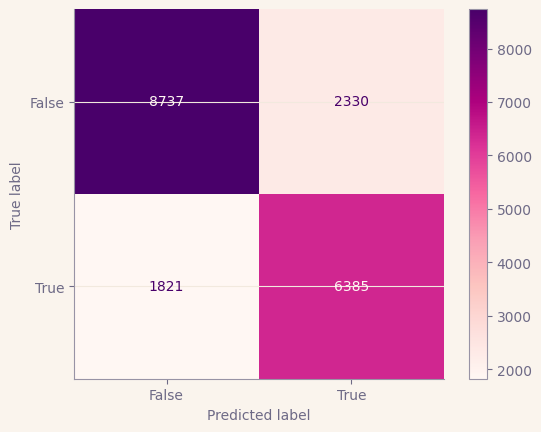

In [47]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(stk,X_test, y_test,display_labels=("False", "True"),cmap="RdPu");

<a id="17"></a>
<h1 style="border-radius: 10px; border: 2px solid #6B8E23; background-color: #F5F5DC; font-family: 'Pacifico', cursive; font-size: 200%; text-align: center; border-radius: 15px 50px; padding: 15px; box-shadow: 5px 5px 5px #556B2F; color: #556B2F;">🏅Prediction🏅</h1>

In [48]:
sub["smoking"]=voting.predict_proba(test)[:, 1]
sub.to_csv('submission.csv',index=False)
sub

,id,smoking
0,159256,0.622558
1,159257,0.297738
2,159258,0.376636
3,159259,0.017866
4,159260,0.583108
...,...,...
106166,265422,0.582361
106167,265423,0.598348
106168,265424,0.495282
106169,265425,0.125586
